第 1 次预测成绩为 87.29, 等级为 B+.
第 2 次预测成绩为 87.50, 等级为 B+.
第 3 次预测成绩为 100.00, 等级为 A+.
第 4 次预测成绩为 87.69, 等级为 B+.


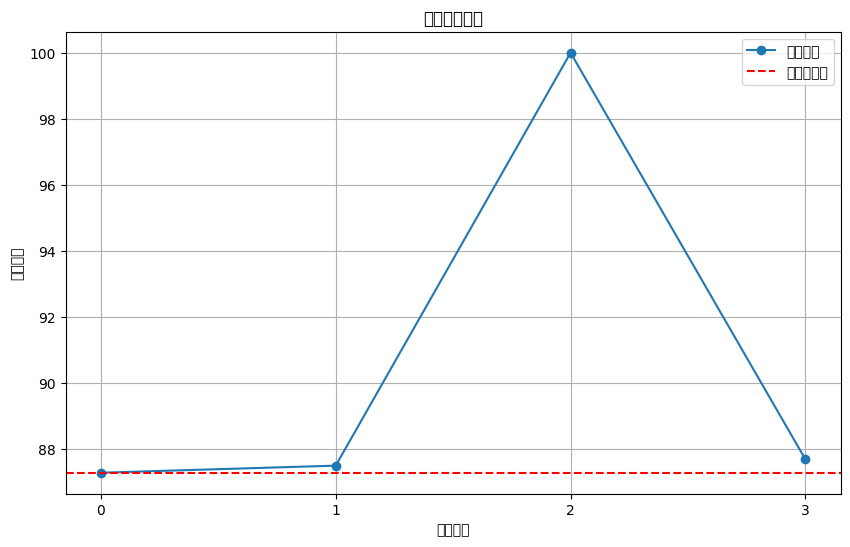

In [53]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建示例数据
data = {
    'student_id': [1],  # 只有一个学生
    'HW_scores': [[86, 87, 85]],  # 作业成绩
    'Quiz_scores': [[87, 90]],     # 测验成绩
    'Exam_scores': [[94, 82]],      # 考试成绩
}

# 将数据转化为DataFrame
df = pd.DataFrame(data)

# 计算每种项目的平均成绩
hw_scores = df['HW_scores'].values[0]
quiz_scores = df['Quiz_scores'].values[0]
exam_scores = df['Exam_scores'].values[0]

# 计算平均值
hw_avg = np.mean(hw_scores) if len(hw_scores) > 0 else 0
quiz_avg = np.mean(quiz_scores) if len(quiz_scores) > 0 else 0
exam_avg = np.mean(exam_scores) if len(exam_scores) > 0 else 0

# 计算当前总成绩
def weighted_average(hw_avg, quiz_avg, exam_avg, hw_count, quiz_count, exam_count):
    total_count = hw_count + quiz_count + exam_count
    weights = {
        'HW': hw_count / total_count if total_count > 0 else 0,   # 作业的权重
        'Quiz': quiz_count / total_count if total_count > 0 else 0, # 测验的权重
        'Exams': exam_count / total_count if total_count > 0 else 0  # 考试的权重
    }
    return (hw_avg * weights['HW'] +
            quiz_avg * weights['Quiz'] +
            exam_avg * weights['Exams'])

current_final_score = weighted_average(hw_avg, quiz_avg, exam_avg, len(hw_scores), len(quiz_scores), len(exam_scores))

# 模拟未来成绩
def simulate_future_scores(current_final_score, hw_scores, quiz_scores, exam_scores, hw_count, quiz_count, exam_count):
    future_scores = [current_final_score]  # 先加入当前成绩
    # 记录当前成绩次数
    current_hw_count = len(hw_scores)
    current_quiz_count = len(quiz_scores)
    current_exam_count = len(exam_scores)

    # 针对缺失的成绩进行模拟
    for _ in range(hw_count - current_hw_count):
        predicted_hw_avg = np.clip(np.random.normal(loc=hw_avg, scale=2), 0, 100)  # 将标准差设为2
        future_scores.append(weighted_average(
            (np.mean(hw_scores + [predicted_hw_avg]) if current_hw_count > 0 else predicted_hw_avg),
            quiz_avg,
            exam_avg,
            current_hw_count + 1,
            current_quiz_count,
            current_exam_count
        ))
        hw_scores = np.append(hw_scores, predicted_hw_avg)  # 更新作业成绩

    for _ in range(quiz_count - current_quiz_count):
        predicted_quiz_avg = np.clip(np.random.normal(loc=quiz_avg, scale=2), 0, 100)  # 将标准差设为2
        future_scores.append(weighted_average(
            hw_avg,
            (np.mean(quiz_scores + [predicted_quiz_avg]) if current_quiz_count > 0 else predicted_quiz_avg),
            exam_avg,
            current_hw_count,
            current_quiz_count + 1,
            current_exam_count
        ))
        quiz_scores = np.append(quiz_scores, predicted_quiz_avg)  # 更新测验成绩

    for _ in range(exam_count - current_exam_count):
        predicted_exam_avg = np.clip(np.random.normal(loc=exam_avg, scale=2), 0, 100)  # 将标准差设为2
        future_scores.append(weighted_average(
            hw_avg,
            quiz_avg,
            (np.mean(exam_scores + [predicted_exam_avg]) if current_exam_count > 0 else predicted_exam_avg),
            current_hw_count,
            current_quiz_count,
            current_exam_count + 1
        ))
        exam_scores = np.append(exam_scores, predicted_exam_avg)  # 更新考试成绩

    # 确保所有成绩在0到100之间
    future_scores = [np.clip(score, 0, 100) for score in future_scores]

    return future_scores

# 定义所需的总成绩次数
total_hw = 5  # 目标作业次数
total_quiz = 3  # 目标测验次数
total_exam = 2  # 目标考试次数

# 获取未来成绩
future_scores = simulate_future_scores(current_final_score, hw_scores, quiz_scores, exam_scores, total_hw, total_quiz, total_exam)

# 成绩等级评估函数
def evaluate_grade(score):
    if score >= 97:
        return 'A+'
    elif score >= 93:
        return 'A'
    elif score >= 90:
        return 'A-'
    elif score >= 87:
        return 'B+'
    elif score >= 83:
        return 'B'
    elif score >= 80:
        return 'B-'
    elif score >= 77:
        return 'C+'
    elif score >= 73:
        return 'C'
    elif score >= 70:
        return 'C-'
    elif score >= 67:
        return 'D+'
    elif score >= 63:
        return 'D'
    elif score >= 60:
        return 'D-'
    else:
        return 'F'

# 输出结果
for i, score in enumerate(future_scores):
    print(f"第 {i + 1} 次预测成绩为 {score:.2f}, 等级为 {evaluate_grade(score)}.")

# 绘制成绩曲线
plt.figure(figsize=(10, 6))
plt.plot(future_scores, label='预测成绩', marker='o')
plt.axhline(y=current_final_score, color='r', linestyle='--', label='当前总成绩')
plt.title('未来成绩模拟')
plt.xlabel('模拟次数')
plt.ylabel('预测成绩')
plt.xticks(range(len(future_scores)))  # 根据未来成绩长度设置x轴刻度
plt.legend()
plt.grid()
plt.show()
